# Student grades prediction

## Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

## **2. Data Preprocessing:**

### 2.1. Importing Libraries and Data

In [ ]:
df = pd.read_csv('Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


### 2.2. Data Overview and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [ ]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [ ]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


### 2.3. Data Preprocessing

In [ ]:
# Data Preprocessing
# Replace missing values with a default grade (e.g., 'C')
df.fillna('C', inplace=True)

In [ ]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

### 2.4. Handle missing values

In [ ]:
# Handle missing values with a default grade (e.g., 'C')
df.fillna('C', inplace=True)

# Encode letter grades to numerical values
grade_scale = {'A+': 4.0, 'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, 'B-': 2.7, 'C+': 2.3, 'C': 2.0, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'F': 0.0}
for col in df.columns[1:-1]:  # Skip the 'Seat No.' and 'CGPA' columns
    df[col] = df[col].map(grade_scale)

In [ ]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


## 3. Exploratory Data Analysis (EDA)
### 3.1 Summary Statistics

In [ ]:
summary_stats = df.describe()
print(summary_stats)

           PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  569.000000  571.000000  568.000000  569.000000  568.000000  571.000000   
mean     3.008963    2.603503    3.269190    2.867487    2.990493    3.312084   
std      0.963456    0.911248    0.903404    1.006903    0.923005    0.810746   
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%      2.300000    2.000000    3.000000    2.000000    2.300000    3.000000   
50%      3.300000    2.700000    3.700000    3.000000    3.300000    3.700000   
75%      3.700000    3.300000    4.000000    3.700000    3.700000    4.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  569.000000  568.000000  570.000000  569.000000  ...  569.000000   
mean     2.949385    2.970246    3.006667    2.690158  ...    2.914587   
std      0.843223    0.951771    0.822139    1.0

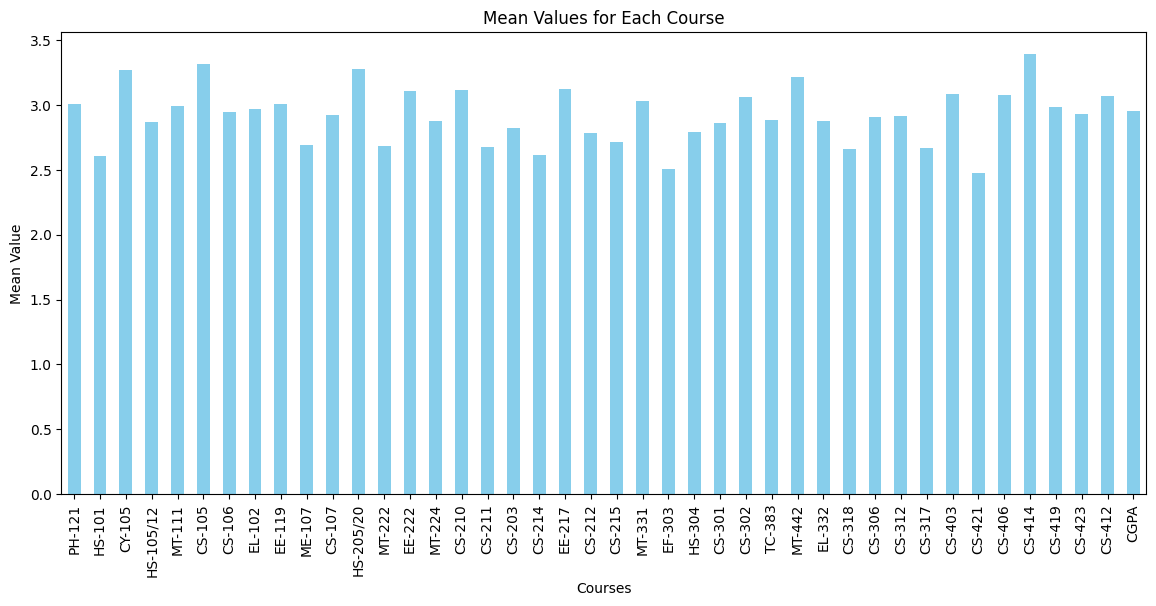

In [ ]:
# Get the summary statistics
summary_stats = df.describe()

# Create a bar plot for the mean values
mean_values = summary_stats.loc['mean']
mean_values.plot(kind='bar', figsize=(14, 6), color='skyblue')
plt.title('Mean Values for Each Course')
plt.xlabel('Courses')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.show()

### 3.2 Data Visualization

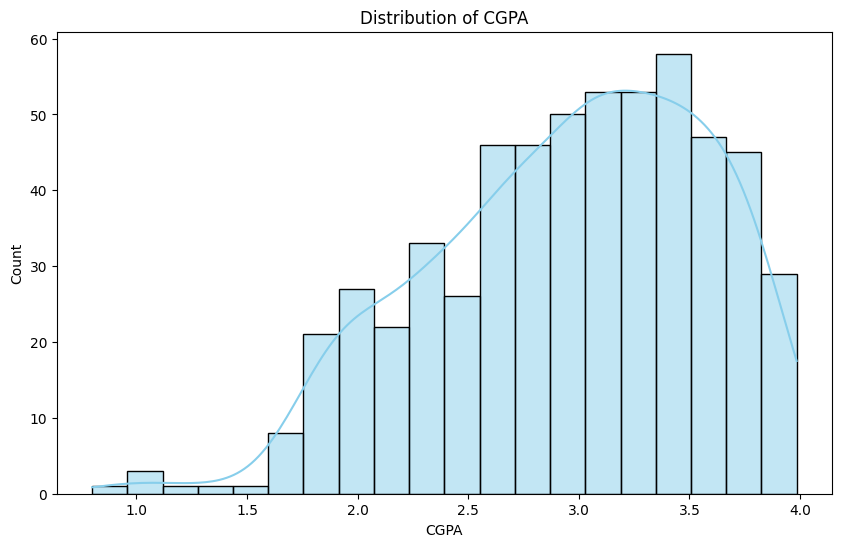

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of CGPA
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

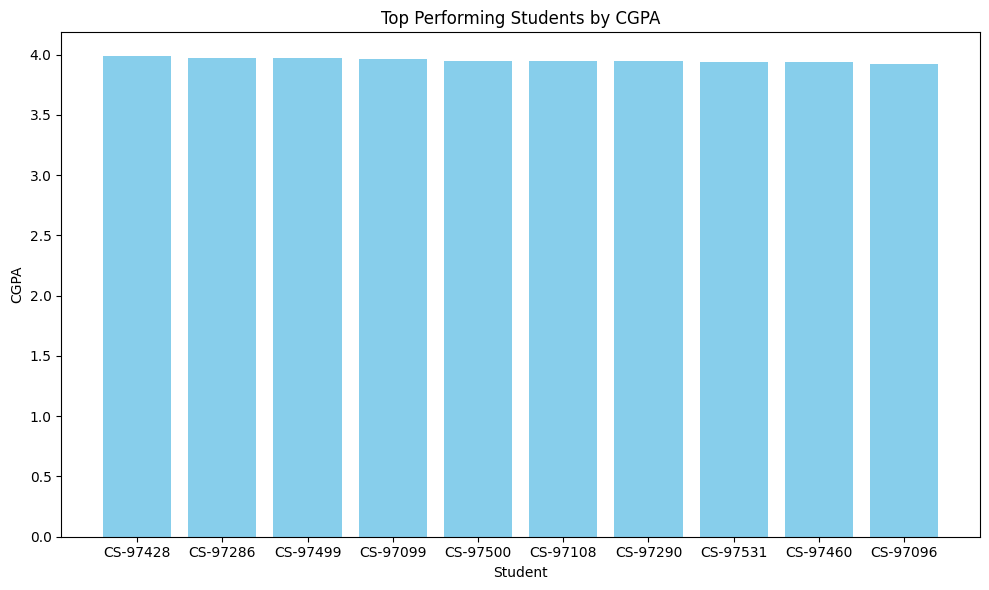

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by CGPA in descending order to get the top-performing students
top_students = df.sort_values(by='CGPA', ascending=False).head(10)  # Change the number (10) as needed

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_students['Seat No.'], top_students['CGPA'], color='skyblue')
plt.xlabel('Student')
plt.ylabel('CGPA')
plt.title('Top Performing Students by CGPA')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

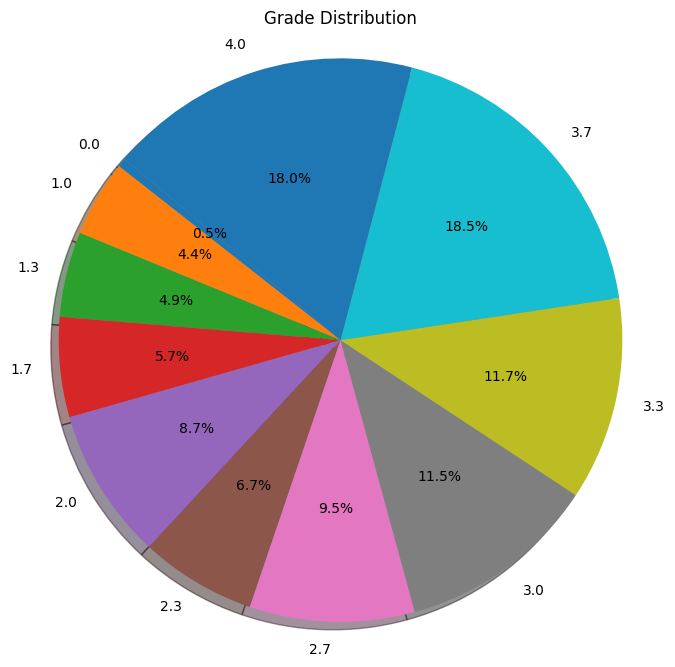

In [ ]:
# Count the frequency of each grade and create a DataFrame
grade_counts = df.iloc[:, 1:-1].stack().value_counts().sort_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Add a title
plt.title('Grade Distribution', color='Black')  # Set the title text color to white

# Show the pie chart
plt.show()

<ipython-input-13-9f869f1167be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


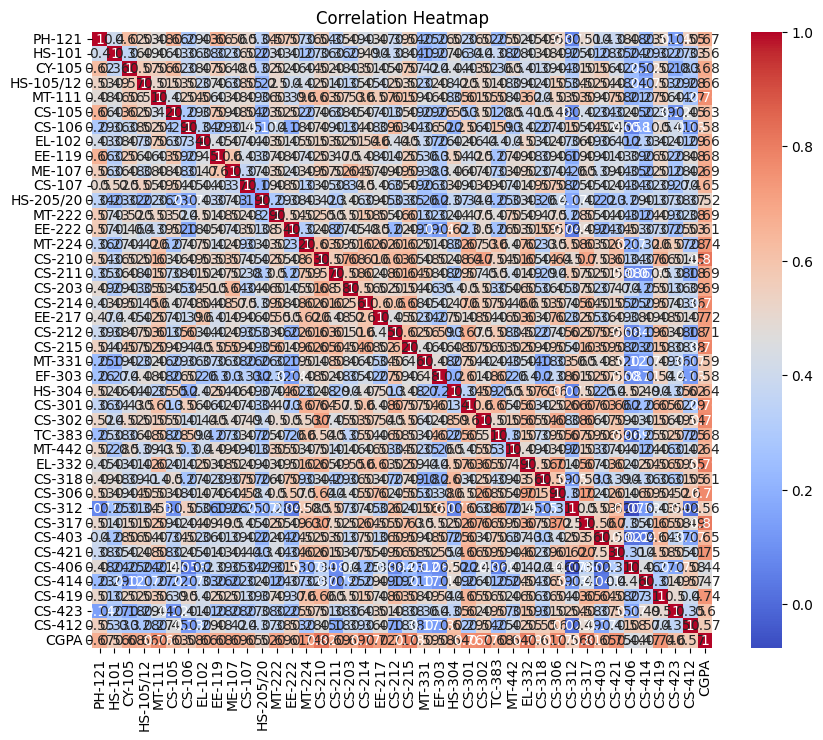

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### 3.3. Data Splitting

In [ ]:
# Split the data into features (X) and target (y)
X = df.iloc[:, 1:-1]  # Features are all columns except 'Seat No.' and 'CGPA'
y = df['CGPA']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

## **4.Model Evaluation and Comparison**

In [ ]:
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']

    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)

    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results

results = evaluate(X_train, X_test, y_train, y_test)


## **4.2.Model Performance Visualization.**

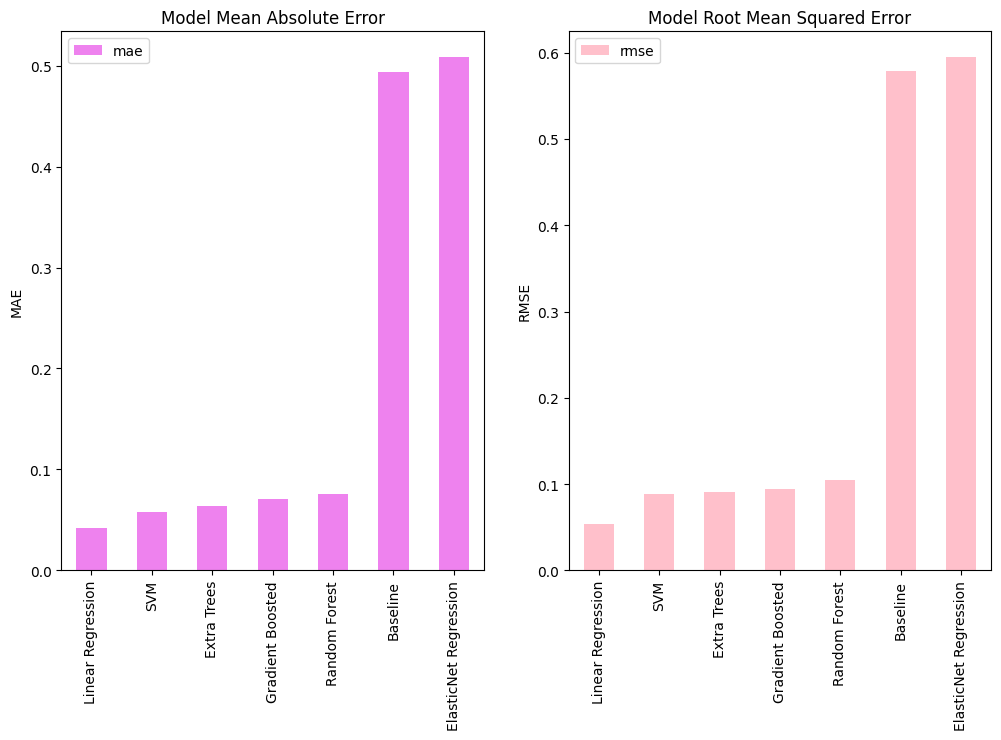

In [ ]:

plt.figure(figsize=(12, 7))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'violet', ax = ax)
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending=True).plot.bar(y='rmse', color='pink', ax=ax)
plt.title('Model Root Mean Squared Error')
plt.ylabel('RMSE')

plt.show()


## Conclusion:
As we see both Model Mean Absolute Error & Model Root Mean Squared Error that the ElasticNet regression is performing the best in both cases